In [64]:
import os
import xarray as xa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylibs.utils import get_dates

In [57]:
sdate = 2024110100
edate = 2024113018
date_interval = 6
dates = get_dates(sdate, edate, date_interval)
plot_ch = 4
plotvar = 'aerosolOpticalDepth'

In [71]:
plts_savedir = '/glade/work/swei/projects/mmm.pace_aod/plots'
ioda_path = '/glade/campaign/ncar/nmmm0072/Data/obs'
obs_name_list = [
    'modis_terra_aod', 'modis_aqua_aod', 'pace_aod',
    'viirs_aod_dt_npp', 'viirs_aod_dt_n20',
    'viirs_aod_db_npp', 'viirs_aod_db_n20',
]
if not os.path.exists(plts_savedir):
    os.makedirs(plts_savedir)

In [58]:
df = pd.DataFrame()
for j, obsname in enumerate(obs_name_list):
    print(f'Processing {obsname}')
    daterange_list = []
    volume_list = []
    for i, cdate in enumerate(dates):
        cdate_str = cdate.strftime('%Y%m%d%H')
        iodafile = f'{ioda_path}/{obsname}/obs.{obsname}.{cdate_str}.nc4'

        dims_ds = xa.open_dataset(iodafile)
        volume_list.append(dims_ds.Location.size)
        meta_ds = xa.open_dataset(iodafile, group='MetaData')
        datetime_min = meta_ds.dateTime.data.min()
        datetime_max = meta_ds.dateTime.data.max()
        daterange_list.append([datetime_min, datetime_max])
    
    columns = [(obsname, 'date range'), (obsname, 'volume')]
    multi_index = pd.MultiIndex.from_tuples((columns), names=['obsname', 'type'])
    tmpdf = pd.DataFrame(list(zip(daterange_list, volume_list)), columns=multi_index)
    df = pd.concat([df, tmpdf], axis=1)
df = df.set_index(dates)
print('Processing finished')

processing modis_terra_aod
processing modis_aqua_aod
processing pace_aod
processing viirs_aod_dt_npp
processing viirs_aod_dt_n20
processing viirs_aod_db_npp
processing viirs_aod_db_n20


In [59]:
volume_df = df.xs('volume', axis=1, level='type')

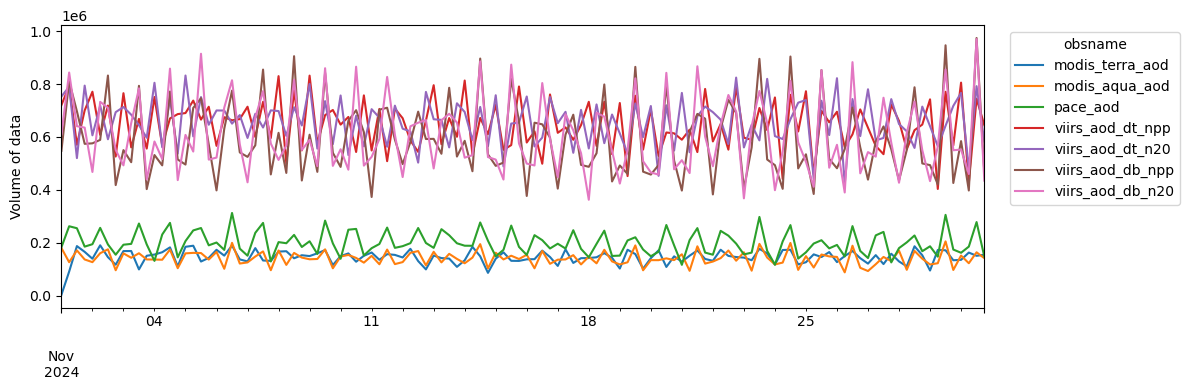

In [75]:
ax = volume_df.plot(
    figsize=(12, 4),
)
plt.ylabel('Volume of data')
ax.legend(title='obsname', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
pltname = f'{plts_savedir}/timeseries.obs_cnts.202411.png'
plt.savefig(pltname, dpi=300)